In [107]:
from ipywidgets import interact
from fastai.basics import *
import numpy as np

In [108]:
plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-4.1, max=4.1, color='r', ylim=None):
    x = torch.linspace(min, max, 100)[:, None]
    if ylim:
        plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)
    



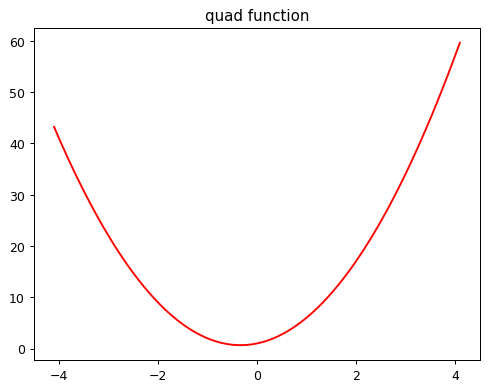

In [109]:
def f(x):return 3*x**2 + 2*x + 1
plot_function(f, 'quad function', color='r')

In [110]:
def quad(a,b,c,x): return a*x**2 + b*x + c

In [111]:
"""
If we fix some particular values of a, b, and c, then we'll have made a quadratic. 
To fix values passed to a function in python, we use the partial function, like so:
"""

from functools import partial

def mk_quad(a,b,c): return partial(quad, a,b,c)

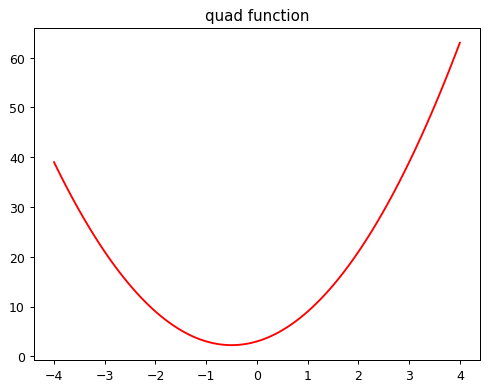

In [112]:
f2 = mk_quad(3,3,3)
plot_function(f2, "quad function", min=-4, max=4)

In [113]:
"""
Now let's simulate making some noisy measurements of our quadratic f. 
We'll then use gradient descent to see if we can recreate the original function from the data.
Here's a couple of functions to add some random noise to data:
"""

def noise(scale, x): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x*(1+noise(x=x,scale=mult))+noise(x=x,scale=add)

np.random.seed(42)

x = torch.linspace(-2,2, steps=20)[:, None]
y = add_noise(quad(2,3,4,x=x), mult=0.15, add=1.5)

/var/folders/42/6tslf6157v17txfqd2q092d40000gn/T/ipykernel_32936/4063300274.py:8: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  def add_noise(x, mult, add): return x*(1+noise(x=x,scale=mult))+noise(x=x,scale=add)


In [114]:
print(y)

tensor([[ 8.6455],
        [ 4.5929],
        [ 4.7634],
        [ 2.3343],
        [ 2.2785],
        [ 3.0156],
        [ 1.8300],
        [ 3.8811],
        [ 2.1221],
        [ 3.5705],
        [ 3.1338],
        [ 7.5657],
        [ 6.3353],
        [ 3.6158],
        [ 7.6362],
        [ 7.4673],
        [10.3633],
        [11.4303],
        [11.6323],
        [14.4821]], dtype=torch.float64)


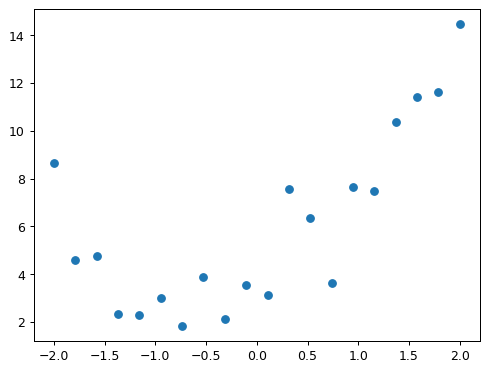

In [115]:
plt.scatter(x,y)

In [116]:
x = torch.linspace(-4, 4, steps=40)
y = add_noise(f(x), 0.45, 1.5)

/var/folders/42/6tslf6157v17txfqd2q092d40000gn/T/ipykernel_32936/4063300274.py:8: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  def add_noise(x, mult, add): return x*(1+noise(x=x,scale=mult))+noise(x=x,scale=add)


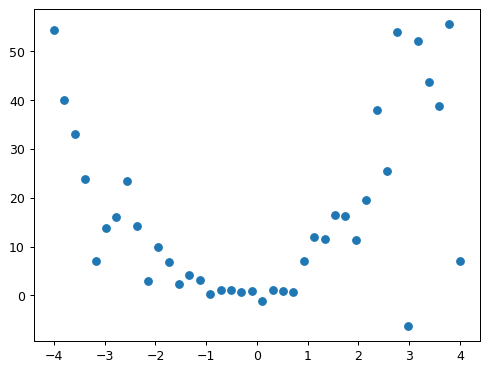

In [117]:
plt.scatter(x,y)

In [118]:
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a,b,c):
    plt.scatter(x,y)
    plot_function(mk_quad(a,b,c), ylim=(-10,50))

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

In [119]:
def mae(preds, acts): return (torch.abs(preds-acts)).mean()

In [120]:
# @interact(a=1.1, b=1.1, c=1.1)
# def plot_quad(a, b, c):
#     f = mk_quad(a,b,c)
#     plt.scatter(x,y)
#     loss = mae(f(x), y)
#     plot_function(f, ylim=(-3,12), title=f"MAE: {loss:.2f}")


@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a,b,c):
    f = mk_quad(a,b,c)
    plt.scatter(x,y)
    loss = mae(f(x), y)
    plot_function(f, ylim=(-3,12), title=f"MAE: {loss:.2f}")

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

In [121]:
"""
Automating Gradient Descent
"""

def quad_mae(params):
    f = mk_quad(*params)
    print(f(x))
    print(y)
    return mae(f(x), y)

In [122]:
quad_mae([4,5,6])

tensor([50.0000, 44.6299, 39.5963, 34.8994, 30.5391, 26.5154, 22.8284, 19.4780,
        16.4642, 13.7870, 11.4464,  9.4425,  7.7751,  6.4444,  5.4504,  4.7929,
         4.4721,  4.4878,  4.8402,  5.5293,  6.5549,  7.9172,  9.6160, 11.6515,
        14.0237, 16.7324, 19.7778, 23.1598, 26.8784, 30.9336, 35.3254, 40.0539,
        45.1190, 50.5207, 56.2590, 62.3340, 68.7456, 75.4938, 82.5786, 90.0000])
tensor([54.2952, 39.9725, 33.0058, 23.9453,  7.1433, 13.8449, 16.0125, 23.5077,
        14.1882,  2.9622,  9.8796,  6.9367,  2.4403,  4.1844,  3.1627,  0.2314,
         1.1353,  1.0487,  0.7760,  0.8373, -1.1530,  1.1098,  0.8993,  0.6352,
         7.1357, 11.9989, 11.5376, 16.4870, 16.2083, 11.4492, 19.4732, 37.8843,
        25.5256, 54.0411, -6.2793, 52.0773, 43.7345, 38.7830, 55.6458,  7.1468],
       dtype=torch.float64)


tensor(12.4234, dtype=torch.float64)

In [123]:
"""
We're first going to do exactly the same thing as we did manually -- 
pick some arbritrary starting point for our parameters. 
We'll put them all into a single tensor:
"""

abc = torch.tensor([1.1, 1.1, 1.1])
abc.requires_grad_()

tensor([1.1000, 1.1000, 1.1000], requires_grad=True)

In [124]:
loss = quad_mae(abc)
loss

tensor([14.3000, 12.7668, 11.3262,  9.9781,  8.7226,  7.5597,  6.4893,  5.5116,
         4.6264,  3.8337,  3.1337,  2.5262,  2.0112,  1.5889,  1.2591,  1.0219,
         0.8773,  0.8252,  0.8657,  0.9988,  1.2244,  1.5426,  1.9534,  2.4567,
         3.0527,  3.7412,  4.5222,  5.3959,  6.3621,  7.4208,  8.5722,  9.8161,
        11.1526, 12.5817, 14.1033, 15.7175, 17.4243, 19.2236, 21.1155, 23.1000],
       grad_fn=<AddBackward0>)
tensor([54.2952, 39.9725, 33.0058, 23.9453,  7.1433, 13.8449, 16.0125, 23.5077,
        14.1882,  2.9622,  9.8796,  6.9367,  2.4403,  4.1844,  3.1627,  0.2314,
         1.1353,  1.0487,  0.7760,  0.8373, -1.1530,  1.1098,  0.8993,  0.6352,
         7.1357, 11.9989, 11.5376, 16.4870, 16.2083, 11.4492, 19.4732, 37.8843,
        25.5256, 54.0411, -6.2793, 52.0773, 43.7345, 38.7830, 55.6458,  7.1468],
       dtype=torch.float64)


tensor(11.6044, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [125]:
"""
To get PyTorch to now calculate the gradients, we need to call backward()
The gradients will be stored for us in an attribute called grad:
"""

loss.backward()
abc.grad

tensor([-3.5350,  0.0974, -0.4500])

In [126]:
with torch.no_grad():
    abc -= abc.grad*0.09
    loss = quad_mae(abc)
    
print(f'loss={loss:.2f}')

tensor([19.4660, 17.4223, 15.4980, 13.6929, 12.0073, 10.4409,  8.9939,  7.6663,
         6.4580,  5.3690,  4.3994,  3.5492,  2.8183,  2.2067,  1.7145,  1.3416,
         1.0880,  0.9538,  0.9390,  1.0435,  1.2673,  1.6105,  2.0731,  2.6549,
         3.3562,  4.1767,  5.1166,  6.1759,  7.3545,  8.6524, 10.0697, 11.6064,
        13.2624, 15.0377, 16.9324, 18.9464, 21.0797, 23.3324, 25.7045, 28.1959])
tensor([54.2952, 39.9725, 33.0058, 23.9453,  7.1433, 13.8449, 16.0125, 23.5077,
        14.1882,  2.9622,  9.8796,  6.9367,  2.4403,  4.1844,  3.1627,  0.2314,
         1.1353,  1.0487,  0.7760,  0.8373, -1.1530,  1.1098,  0.8993,  0.6352,
         7.1357, 11.9989, 11.5376, 16.4870, 16.2083, 11.4492, 19.4732, 37.8843,
        25.5256, 54.0411, -6.2793, 52.0773, 43.7345, 38.7830, 55.6458,  7.1468],
       dtype=torch.float64)
loss=10.48
